In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
working_dir = r'../../../outputs/agg/dash'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [7]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [8]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,040,013","4,051,248"


# Total Households

In [9]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,656,512"


# Total Trips

In [10]:
df = load_data('trip_purpose_mode')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,373,321","20,116,075"


# Total Tours

In [11]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,426,750","6,807,631"


## Average Household Size

In [12]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [13]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.11     34.05      0.00
           survey     -1.00     -1.00     -1.00
HOV2       model       8.86     20.32      0.00
           survey     -1.00     -1.00     -1.00
HOV3+      model       9.13     20.66      0.00
           survey     -1.00     -1.00     -1.00
SOV        model       9.15     21.16      0.00
           survey     -1.00     -1.00     -1.00
School Bus model       3.71     11.54      0.00
           survey     -1.00     -1.00     -1.00
TNC        model       2.28     10.16      0.00
           survey     -1.00     -1.00     -1.00
Transit    model       9.92     41.24      0.00
           survey     -1.00     -1.00     -1.00
Walk       model       0.71     14.14      0.00
           survey     -1.00     -1.00     -1.00

## Average Distance to School

In [14]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       3.07     20.45      0.00
           survey     -1.00     -1.00     -1.00
HOV2       model       3.41     10.81      0.00
           survey     -1.00     -1.00     -1.00
HOV3+      model       3.62     11.20      0.00
           survey     -1.00     -1.00     -1.00
SOV        model       6.07     15.63      0.00
           survey     -1.00     -1.00     -1.00
School Bus model       3.33     10.77      0.00
           survey     -1.00     -1.00     -1.00
TNC        model       2.46      9.46      0.00
           survey     -1.00     -1.00     -1.00
Transit    model       5.87     37.23      0.00
           survey     -1.00     -1.00     -1.00
Walk       model       1.39     27.72      0.00
           survey     -1.00     -1.00     -1.00

## Transit Pass Ownership

In [15]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,239,314","3,264,963"
1,"800,699","786,285"


In [16]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"1,691","9,796"
Full-Time Worker,"470,962","709,233"
High School Student Age 16+,"169,132","5,549"
Non-Working Adult Age 65+,334,329
Non-Working Adult Age <65,"20,282",NaN
Part-Time Worker,"45,516","44,097"
University Student,"92,782","15,414"


# Auto Ownership
## By Income

In [17]:
df = load_data('auto_ownership')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0.0    model   54,815   24,129   12,512    3,495  19,327
       survey  62,425   27,901   17,279        0  20,465
1.0    model  118,919  111,334   90,989   31,708 170,504
       survey 138,715  102,527  110,953        0 159,884
2.0    model   30,192   50,628   67,864   36,060 345,821
       survey  90,479   83,871   75,214        0 370,829
3.0    model    7,423   14,619   27,192   15,410 215,282
       survey  46,620   19,428   22,998        0 175,287
4+     model    2,787    5,571    9,768    5,612 109,639
       survey   6,152      486   13,427        0  92,947

In [18]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='hh_county', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

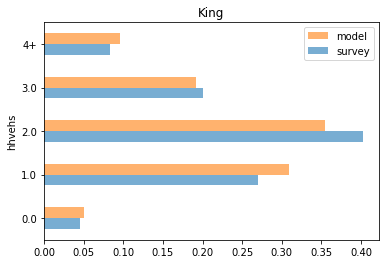

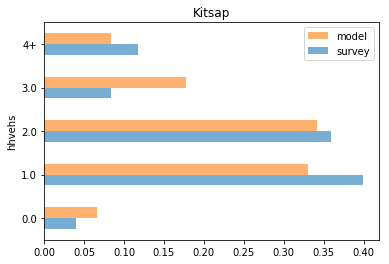

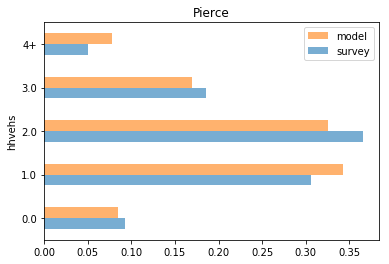

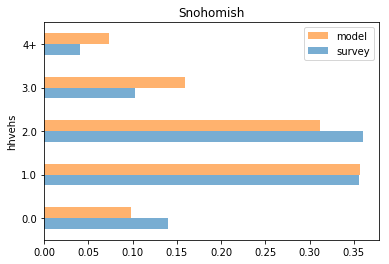

In [19]:
for county in df['hh_county'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [20]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County     King Kitsap  Pierce Snohomish
Home County                                  
King         465,900 31,588  88,719   131,742
Kitsap        15,674 32,797  50,926    89,116
Pierce        47,432 45,882 166,844   204,869
Snohomish     35,822 51,706 126,419   263,101